In [18]:
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import os
import time
import seaborn as sns
from PIL import Image
import numpy as np
from sklearn.linear_model import LinearRegression
from datetime import datetime
import seaborn as sns
from sklearn import model_selection
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('MM_Data.csv')
data

,User,Location,Tweet,Num of Friend,Num of Followers,Total Tweets by user,Account Created at,Tweet Created at,Num of Retweet,hashtags in the tweet,...,word_want,word_watch,word_watching,word_way,word_white,word_woman,word_women,word_world,word_wow,Follow Ratio
0,LordHthegreatH1,nice place on Earth,@RoyalFamily @ClarenceHouse @KensingtonRoyal\n...,51,36,1407,2020-09-30 10:31:14,2021-03-11 23:59:06,1,['princewilliam'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705882
1,_memoRandom,NaN,"Listen to my latest podcast episode, entitled ...",46,47,9775,2014-11-01 16:34:21,2021-03-11 23:57:51,0,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.021739
2,PigSty96452169,NaN,#MeghanMarkle is salty AF 'cause her #moonbump...,125,122,4826,2020-06-22 20:11:14,2021-03-11 23:57:44,0,"['meghanmarkle', 'moonbump']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.976000
3,gofollie,"Pennsylvania, USA",#meghanmarkle didn’t know anything about the B...,172,99,2667,2020-07-03 12:31:14,2021-03-11 23:57:35,0,"['meghanmarkle', 'meghanmarkleisaliarandabully...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575581
4,UKEU360,"London, capital city of France",#RoyalFamily \n#MeghanandHarryonOprah \n#Oprah...,386,233,10771,2021-01-12 16:57:28,2021-03-11 23:56:36,0,"['royalfamily', 'meghanandharryonoprah', 'opra...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.603627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52815,SoapOperaSpy,NaN,Royals News: Prince Harry And Meghan Markle Lo...,13120,21953,152338,2014-01-23 03:12:12,2021-03-04 14:49:45,0,"['princeharry', 'meghanmarkle']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.673247
52816,C0C0AM,NaN,Well the public deserve to know #BuckinghamPal...,188,138,9823,2017-03-22 01:18:53,2021-03-04 14:49:14,0,"['buckinghampalace', 'meghanmarkle', 'princean...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.734043
52817,gofollie,"Pennsylvania, USA",@benshapiro #meghanmarkle is invading my priva...,173,99,2669,2020-07-03 12:31:14,2021-03-04 14:46:46,0,['meghanmarkle'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.572254
52818,ParadeMagazine,NaN,Untangling the Provenance of #MeghanMarkle’s C...,1578,25327,37907,2009-01-06 16:29:00,2021-03-04 14:44:33,0,['meghanmarkle'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.050063


In [4]:
# Focus on the "compound" scores 
#Create a new column called "sentiment_class"
sentimentclass_list = []

for i in range(0, len(data)):
    #current 'compound' score:
    curr_compound = data.iloc[i,:]['compound']
    
    if (curr_compound >= 0.55 and curr_compound <= 1.0 ):
        sentimentclass_list.append(5)
    elif (curr_compound >= 0.10 and curr_compound < 0.55 ):
        sentimentclass_list.append(4)
    elif (curr_compound > -0.10 and curr_compound < 0.10 ):
        sentimentclass_list.append(3)
    elif (curr_compound > -0.55 and curr_compound <= -0.10 ):
        sentimentclass_list.append(2)
    elif (curr_compound >= -1.0 and curr_compound <= -0.55 ):
        sentimentclass_list.append(1)
        
        
#Add the new column 'sentiment_class' to the dataframe 
data['sentiment_class'] = sentimentclass_list

#Check the new column
data.tail(10)['sentiment_class']

52810    1
52811    2
52812    2
52813    1
52814    4
52815    3
52816    4
52817    3
52818    4
52819    1
Name: sentiment_class, dtype: int64

In [5]:
#Verify if the classification assignment is correct 
data.iloc[0:10,:][['compound', 'sentiment_class']]

,compound,sentiment_class
0,0.5398,4
1,0.2732,4
2,0.0000,3
3,0.0000,3
4,0.0000,3
5,-0.2960,2
6,0.4767,4
7,0.0000,3
8,0.0000,3
9,0.0000,3


C:\Users\Brie - Work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


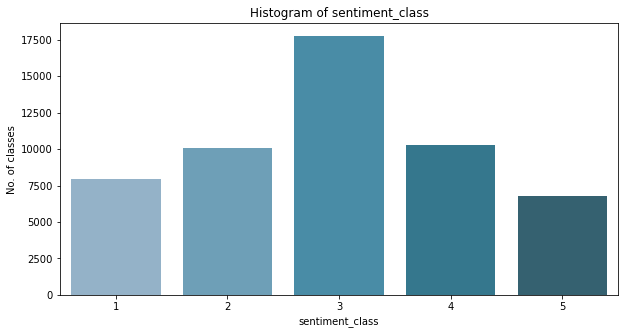

In [6]:
# Distribution of sentiment_class
plt.figure(figsize = (10,5))
sns.set_palette('PuBuGn_d')
sns.countplot(data['sentiment_class'])
plt.title('Histogram of sentiment_class')
plt.xlabel('sentiment_class')
plt.ylabel('No. of classes')
plt.show()

In [7]:
#Display full text: 
pd.set_option('display.max_colwidth', -2)

#Look at some example of negative, neutral and positive tweets

#Filter 5 negative tweets: 
print("10 random negative tweets and sentiment classes:")
data[(data['sentiment_class'] == 1) | (data['sentiment_class'] == 2)].sample(n=10)[['Tweet', 'sentiment_class']]

<ipython-input-7-421443391587>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -2)


10 random negative tweets and sentiment classes:


,Tweet,sentiment_class
21685,"@NYTIMES No one thought this lady's column has hints of racism and superiority complex based on colour and power: ""… https://t.co/DCODeWGxpy",1
16070,"Who the hell is this ""Firm""? Sounds like the whole Royal Family thing is a shitshow. More reason to get rid of them… https://t.co/q5vnvaBxGN",2
8307,"#BREAKING | British television network, @ITV has confirmed that @PiersMorgan has resigned from @GMB, following his… https://t.co/geldCXGDKv",2
34244,#MeghanMarkle says her one regret is “believing” the royal family when “they said I’d be protected” 😬 \n#OprahMeghanHarry,2
8652,"Black women aren't allowed to be vulnerable, emotional, or show weakness. Society thinks when we ""complain"" we are… https://t.co/BfsHpHBakX",2
46231,An outdated white institution terrorising a woman of colour. A narrative that’s been repeated and recycled over and… https://t.co/MWlQ06Uezv,1
783,#MeghanMarkle courtesy of Machiavelli @TheRiseofRod on Gab. Who’s the racist?? https://t.co/G9f1pRXDeG,2
28865,@elguapo64 #mexicans don't dance like that. #OprahMeghanHarry #ifkgbg #NBAAllStar #MeghanMarkle… https://t.co/bIitLJxYWg,2
8530,"@nowthisnews Slander further victimizes the innocent and it must have consequences for it's cruelty, depravity, and… https://t.co/4ZcVJq5XRS",1
31139,I was very confused about Megxit and even fed into some of the goss. After this interview I am appalled at how… https://t.co/W2lvwhmBZv,1


In [8]:
#Filter 10 neutral tweets: 
print("10 random neutral tweets and sentiment classes:")
data[(data['sentiment_class'] == 3)].sample(n=10)[['Tweet', 'sentiment_class']]

10 random neutral tweets and sentiment classes:


,Tweet,sentiment_class
24819,@wandaxstony @OriginalFunko Funko Pop Royals Harry &amp; Meghan Music Video #Shorts #MeghanMarkle #Funko #Meghan… https://t.co/hm2qdF66BP,3
18925,"This right here says it all , I 🙌🏾🙌🏾🙌🏾 \n\nThe royal family led by the 👑 was behind imperialism and colonialism which… https://t.co/0wZMtJpAXW",3
26294,@piersmorgan YOU.ARE.RACIST!! PERIOD..end of tweet!! #OprahMeghanHarry #MeghanMarkle #HarryandMeghan,3
28624,Harry Hewitt should have his Duke and Duchess titles removed.\n\n#HarryandMeghanonOprah #HarryandMeghan… https://t.co/bOSkx4dWCD,3
19760,Let me 🔌 yall surveys for Airtime https://t.co/oaRs6cVs0l\n\n#MeghanAndHarry #bukathathidata #MeghanMarkle #GirlTalkZA https://t.co/wWclR9bvok,3
36474,The BBC seem more concerned about the Royal Family's reputation that the idea that they may be a bunch of racists..… https://t.co/JertpkPNnw,3
33473,@t0nit0ne @RoundLike #MeghanMarkle the actress. #HarryandMeghanonOprah,3
45232,#MEGHANMARKLE: i came to eat https://t.co/fvYqYqpfvi,3
42152,I know it’s a loaded question but.... #MeghanMarkle #HarryandMeghanonOprah https://t.co/6kN4BP00E1,3
2507,Anybody have a #meghanmarkle or #MeghanMcCain campaign sign in your front yard? How about a #bidensign? #trumpsign? #betosign ???,3


In [9]:
#Filter 10 positive tweets: 
print("10 random positive tweets and sentiment classes:")
data[(data['sentiment_class'] == 4) | (data['sentiment_class'] == 5)].sample(n=10)[['Tweet', 'sentiment_class']]

10 random positive tweets and sentiment classes:


,Tweet,sentiment_class
33907,"Oprah is the best!!!! That was the best thing in 2021 so far. Wishing Harry and Meghan peace, love and success. How… https://t.co/PPkHBLiGHJ",5
36486,Say what you want about Tyler Perry but the man provides help when it's needed. You can't be mad at that.… https://t.co/NUxID6Snc0,5
38664,The takeaway I hope from all this is that “life is worth living” - #MeghanMarkle who’s cutting onions 🧅 yall… https://t.co/uHkoxlghkX,4
39691,#MeghanMarkle you and Harry are loved in the U.S. So brave of you to admit you need help.,5
18215,"True Duty and Service more than just smiles and waves as the royal family seems to think. Pretty bags, hats, dress… https://t.co/I2gCREEISK",5
43794,"""They were willing to lie to protect other members of the family but to tell the truth to my husband and I""… https://t.co/eFMm486luV",5
21378,@megynkelly Yes Part of the British media is Racist/Biased/Bigoted against #MeghanMarkle Watch 4 Royal Experts lie… https://t.co/mj5apAsyBw,4
40623,@rowdydawg33 @Oprah Me too!\nAnd it looked like #MeghanMarkle really wanted to say who asked about #Archie’s complex… https://t.co/ONrWkCREer,4
30430,I use to love @Bethenny but i know you aren’t on this app bashing a black woman for speaking about what she endure… https://t.co/yMLJ8Vr4rw,4
25087,The times comment section is in a similar meltdown to the Daily Mail - just goes to show this once great paper has… https://t.co/dZON5BcSGc,5


In [10]:
#Extract the useful columns 
focused_data = data[['User', 'Tweet', 'sentiment_class']]
focused_data

,User,Tweet,sentiment_class
0,LordHthegreatH1,"@RoyalFamily @ClarenceHouse @KensingtonRoyal\n ""we are very much not a racist family"" said #PrinceWilliam… https://t.co/eovEe8h92H",4
1,_memoRandom,"Listen to my latest podcast episode, entitled ""AVIOT - S2 - Episode 21 - The case of Meghan Markle (Feat. Toya)"". ⚓… https://t.co/YxYBvdQljP",4
2,PigSty96452169,"#MeghanMarkle is salty AF 'cause her #moonbump, 'Archie' didn't get a (racist) royal title. So... since 'Archie' c… https://t.co/RXTgHayNkr",3
3,gofollie,#meghanmarkle didn’t know anything about the BRF\n#meghanmarkleisaliarandabully #meghanmarklecansuckspotteddicks https://t.co/tHX8V9edXs,3
4,UKEU360,"#RoyalFamily \n#MeghanandHarryonOprah \n#OprahMeghanHarry \n#MeghanMarkle \n#MeghanAndHarry \n\nA household in exile, whi… https://t.co/ENkoIP4FeA",3
...,...,...,...
52815,SoapOperaSpy,Royals News: Prince Harry And Meghan Markle Lose Financial Support From Prince Charles #PrinceHarry #MeghanMarkle\n\nhttps://t.co/Ou2yof2M1v,3
52816,C0C0AM,Well the public deserve to know #BuckinghamPalace!? #MeghanMarkle #PrinceAndrew #PrinceHarry #MeghanAndHarry… https://t.co/MlnZF8cakC,4
52817,gofollie,@benshapiro #meghanmarkle is invading my privacy at this point‼️,3
52818,ParadeMagazine,Untangling the Provenance of #MeghanMarkle’s Controversial Diamond Earrings Gifted By Saudi Prince… https://t.co/ZhN93AMYAD,4


In [11]:
# Turn the scores into sentiment
#Create a new column called "sentiment_class"
sentimentclass_translate = []

for i in range(0, len(focused_data)):
    #current 'sentimentscore' score:
    sentiment = focused_data.iloc[i,:]['sentiment_class']
    
    if (sentiment >=1 and sentiment < 3 ):
        sentimentclass_translate.append('negative')
    elif (sentiment == 3):
        sentimentclass_translate.append('neutral')
    elif (sentiment >3 and sentiment <= 5):
        sentimentclass_translate.append('positive')
        
        
#Add the new column 'sentiment_class' to the dataframe 
focused_data['sentiment'] = sentimentclass_translate

#Drop the 'sentiment_class' column the dataframe 
focused_data.drop(['sentiment_class'] , axis = 1, inplace = True)


#Check the new column
focused_data


<ipython-input-11-5a58200b8ecf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focused_data['sentiment'] = sentimentclass_translate
C:\Users\Brie - Work\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,User,Tweet,sentiment
0,LordHthegreatH1,"@RoyalFamily @ClarenceHouse @KensingtonRoyal\n ""we are very much not a racist family"" said #PrinceWilliam… https://t.co/eovEe8h92H",positive
1,_memoRandom,"Listen to my latest podcast episode, entitled ""AVIOT - S2 - Episode 21 - The case of Meghan Markle (Feat. Toya)"". ⚓… https://t.co/YxYBvdQljP",positive
2,PigSty96452169,"#MeghanMarkle is salty AF 'cause her #moonbump, 'Archie' didn't get a (racist) royal title. So... since 'Archie' c… https://t.co/RXTgHayNkr",neutral
3,gofollie,#meghanmarkle didn’t know anything about the BRF\n#meghanmarkleisaliarandabully #meghanmarklecansuckspotteddicks https://t.co/tHX8V9edXs,neutral
4,UKEU360,"#RoyalFamily \n#MeghanandHarryonOprah \n#OprahMeghanHarry \n#MeghanMarkle \n#MeghanAndHarry \n\nA household in exile, whi… https://t.co/ENkoIP4FeA",neutral
...,...,...,...
52815,SoapOperaSpy,Royals News: Prince Harry And Meghan Markle Lose Financial Support From Prince Charles #PrinceHarry #MeghanMarkle\n\nhttps://t.co/Ou2yof2M1v,neutral
52816,C0C0AM,Well the public deserve to know #BuckinghamPalace!? #MeghanMarkle #PrinceAndrew #PrinceHarry #MeghanAndHarry… https://t.co/MlnZF8cakC,positive
52817,gofollie,@benshapiro #meghanmarkle is invading my privacy at this point‼️,neutral
52818,ParadeMagazine,Untangling the Provenance of #MeghanMarkle’s Controversial Diamond Earrings Gifted By Saudi Prince… https://t.co/ZhN93AMYAD,positive
